In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

In [42]:
#loading the dataset
df_train = pd.read_csv('trainstore.csv')

In [43]:
df_test = pd.read_csv('testtsore.csv')

In [7]:
df_train.shape, df_test.shape

((4990, 13), (3532, 12))

In [15]:
df_train.sample(10)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
376,DRL49,BABATUNJI035,DRL49_BABATUNJI035,13.15,Low Sugar,0.056418,Soft Drinks,356.20,2011,Small,Cluster 2,Supermarket Type1,6055.45
3592,FDX31,BABATUNJI035,FDX31_BABATUNJI035,20.35,Normal Sugar,0.014823,Fruits and Vegetables,585.24,2011,Small,Cluster 2,Supermarket Type1,6426.63
2131,FDN46,BABATUNJI049,FDN46_BABATUNJI049,7.21,Normal Sugar,0.144856,Snack Foods,251.33,2006,Medium,Cluster 1,Supermarket Type1,2819.66
1294,FDG33,BABATUNJI019,FDG33_BABATUNJI019,NaN,Normal Sugar,0.245543,Seafood,430.69,1992,Small,Cluster 1,Grocery Store,429.44
4401,NCL31,BABATUNJI017,NCL31_BABATUNJI017,7.39,Low Sugar,0.120961,Others,359.62,2014,NaN,Cluster 2,Supermarket Type1,12167.50
1344,FDH05,BABATUNJI045,FDH05_BABATUNJI045,14.35,Normal Sugar,0.091098,Frozen Foods,584.00,2009,NaN,Cluster 2,Supermarket Type1,4633.97
2155,FDN60,BABATUNJI019,FDN60_BABATUNJI019,NaN,Low Sugar,0.166610,Baking Goods,394.15,1992,Small,Cluster 1,Grocery Store,792.30
2704,FDR56,BABATUNJI049,FDR56_BABATUNJI049,15.50,Normal Sugar,0.100923,Fruits and Vegetables,497.69,2006,Medium,Cluster 1,Supermarket Type1,6897.69
3428,FDW31,BABATUNJI017,FDW31_BABATUNJI017,11.35,Normal Sugar,0.043402,Fruits and Vegetables,492.69,2014,NaN,Cluster 2,Supermarket Type1,6469.91
1364,FDH17,BABATUNJI046,FDH17_BABATUNJI046,16.20,Normal Sugar,0.016653,Frozen Foods,243.43,2004,Small,Cluster 1,Supermarket Type1,5138.31


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


In [9]:
#lets get number of unique items
df_train.nunique()

Item_ID                1451
Store_ID                 10
Item_Store_ID          4990
Item_Weight             399
Item_Sugar_Content        3
Item_Visibility        4638
Item_Type                16
Item_Price             3522
Store_Start_Year          9
Store_Size                3
Store_Location_Type       3
Store_Type                4
Item_Store_Returns     2686
dtype: int64

Text(0.5, 1.0, 'Dsitribution of Returns')

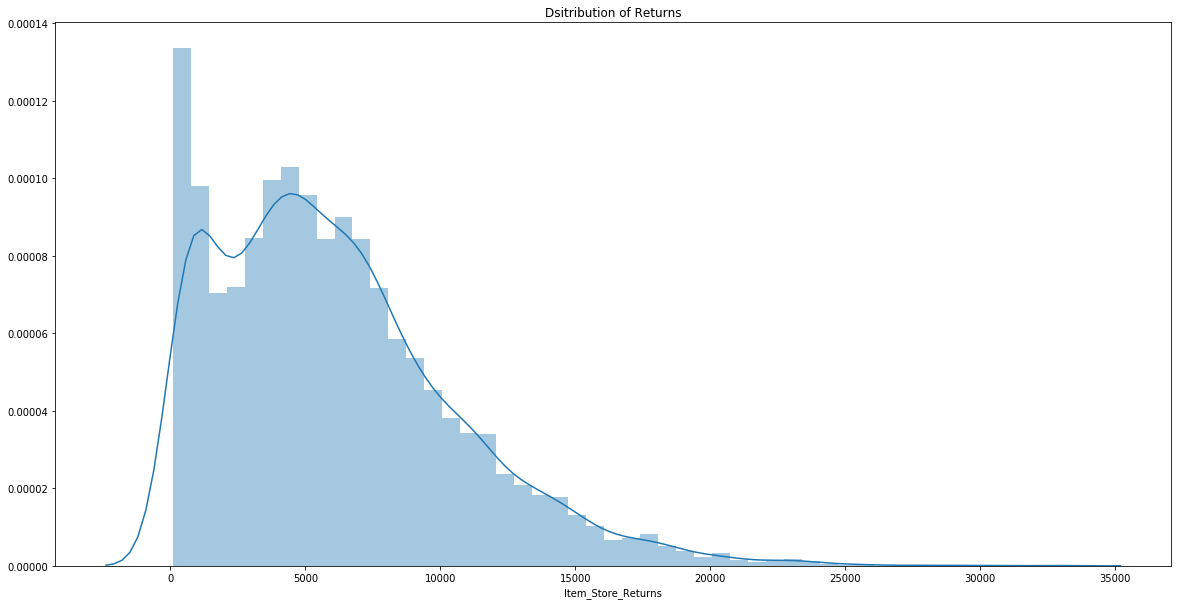

In [74]:
f,ax=plt.subplots(figsize = (20, 10))
sns.distplot(df_train['Item_Store_Returns'])
plt.title('Dsitribution of Returns')

In [44]:
categorical_features = df_train.select_dtypes(include = ['object'])
numerical_features = df_train.select_dtypes(include = [np.number])
categorical_list = categorical_features.columns.tolist()                                        
numerical_list =  numerical_features.columns.tolist()   

In [45]:
categorical_features_test = df_test.select_dtypes(include = ['object'])
numerical_features_test = df_test.select_dtypes(include = [np.number])
categorical_list_test = categorical_features.columns.tolist()                                        
numerical_list_test =  numerical_features_test.columns.tolist()  

In [46]:
df_train["Item_Weight"].fillna(df_train['Item_Weight'].mode()[0], inplace = True)

In [47]:
df_test["Item_Weight"].fillna(df_train['Item_Weight'].mode()[0], inplace = True)

In [48]:
df_train["Store_Size"].fillna(df_train['Store_Size'].mode()[0], inplace = True)

In [49]:
df_test["Store_Size"].fillna(df_train['Store_Size'].mode()[0], inplace = True)

In [55]:
df_train["store_id_num"] = df_train["Store_ID"].str.replace('([A-Za-z]+)','')
df_train["item_num"] = df_train['Item_ID'].str.replace('([A-Za-z]+)', '')

In [56]:
df_train["store_id_num"] = df_train["store_id_num"].astype(float)
df_train["item_num"] = df_train['item_num'].astype(float)

In [58]:
df_test["store_id_num"] = df_test["Store_ID"].str.replace('([A-Za-z]+)','')
df_test["item_num"] = df_test['Item_ID'].str.replace('([A-Za-z]+)', '')

In [60]:
df_test["store_id_num"] = df_train["store_id_num"].astype(float)
df_test["item_num"] = df_train['item_num'].astype(float)

In [21]:
def missing_values(dataframe):
    """
    This function takes a dataframe as input and returns two columns... total missing values and their percentage
    """
    total = dataframe.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(dataframe)*100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total Missing', '%Percentage'])

In [22]:
missing_values(df_train)

,Total Missing,%Percentage
Item_Store_Returns,0,0.0
Store_Type,0,0.0
Store_Location_Type,0,0.0
Store_Size,0,0.0
Store_Start_Year,0,0.0
Item_Price,0,0.0
Item_Type,0,0.0
Item_Visibility,0,0.0
Item_Sugar_Content,0,0.0
Item_Weight,0,0.0


In [77]:
X = df_train.drop(["Item_ID" ,"Item_Store_ID", "Item_Store_Returns"], axis =1)
y = (df_train["Item_Store_Returns"])

X_test = df_test.drop(["Item_ID", "Store_ID" ,"Item_Store_ID"], axis = 1)

In [84]:
y = (df_train["Item_Store_Returns"])

In [78]:
X = X.drop(["Store_ID"], axis =1)

In [79]:
cat = X.select_dtypes(include = ['object'])
catlist = cat.columns.tolist()
print(catlist)

['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']


In [76]:
cat_cols_spec = catlist
for col in cat_cols_spec:
    df_train_col = df_train[col].unique() #get the unique categories in that particular column
    df_test_col = df_test[col].unique()
    print('Categories Not in Test' + col + ' ', [i for i in df_train_col if i not in df_test_col])
    print('Categories Not in Train' + col + ' ',  [i for i in df_test_col if i not in df_train_col])
    print('**'* 35)

Categories Not in TestItem_Sugar_Content  []
Categories Not in TrainItem_Sugar_Content  []
**********************************************************************
Categories Not in TestItem_Type  []
Categories Not in TrainItem_Type  []
**********************************************************************
Categories Not in TestStore_Size  []
Categories Not in TrainStore_Size  []
**********************************************************************
Categories Not in TestStore_Location_Type  []
Categories Not in TrainStore_Location_Type  []
**********************************************************************
Categories Not in TestStore_Type  []
Categories Not in TrainStore_Type  []
**********************************************************************


In [80]:
X_dumy= pd.get_dummies(X)
X_test_dummy = pd.get_dummies(X_test)    

In [81]:
X_dumy.shape, X_test_dummy.shape

((4990, 35), (3532, 35))

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#df_cat = pd.DataFrame()#we are creating a dataframe for categorical features so we can drop the previous dataframe of categorical features

#for i in catlist: #the (i+'_') will add the extra prefix to the name generated by featurehasher
    #df_cat = pd.concat([pd.DataFrame(encoder.fit_transform(X[i]).toarray()).add_prefix(i+'_'),df_cat], axis = 1)

#df_cat.head()#toarray() transforms the list to array wich is acceptable by pandas dataframe

In [68]:
from sklearn.preprocessing import LabelEncoder
cat = X.select_dtypes(include = ['object'])
catlist = cat.columns.tolist()
for i in catlist:
    X[i] = LabelEncoder().fit_transform(X[i])
    X_test[i] = LabelEncoder().fit_transform(X_test[i])

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model_1 =RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 42) 
#model_2 = GradientBoostingRegressor(n_estimators = 500, max_depth = 3, learning_rate = 1)
#model.fit(X_train, y_train)
scores = cross_val_score(model_1, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores))), std(scores)))

root Mean squared error: 2932.654 (650193.599)


In [119]:
model_2 = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state = 42)
scores_2 = cross_val_score(model_2, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_2))), std(scores_2)))

root Mean squared error: 2927.206 (659672.103)


In [99]:
from xgboost import XGBRegressor
xgb_final=XGBRegressor(n_estimators = 10, learning_rate = 0.4, max_depth = 2)
scores_3 = cross_val_score(xgb_final, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_3))), std(scores_3)))

root Mean squared error: 2944.631 (641870.329)


In [107]:
from sklearn.linear_model import Ridge
model_4 = Ridge(alpha = 0.005)
scores_4 = cross_val_score(model_4, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_4))), std(scores_4)))

root Mean squared error: 2962.175 (640702.628)


In [100]:
from sklearn.preprocessing import StandardScaler#we will also try to use minmax scaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline([("scaler", StandardScaler()), ("model", model_4)])
scores_6 = cross_val_score(pipe, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_6))), std(scores_6)))

root Mean squared error: 2962.142 (641614.688)


In [89]:
from sklearn.linear_model import Lasso
las=Lasso(alpha=0.001)
scores_5 = cross_val_score(las, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_5))), std(scores_5)))

root Mean squared error: 2962.154 (638549.958)


In [121]:
from sklearn.ensemble import StackingRegressor
my_estimators = [('xgb', xgb_final), ('rf', model_1), ('gb', model_2)]
streg= StackingRegressor(estimators = my_estimators, final_estimator = model_4)
scores_7 = cross_val_score(streg, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_7))), std(scores_7)))

root Mean squared error: 2922.520 (632929.774)


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X_dumy, y, test_size = 0.2, random_state = 0)
model_4.fit(X_train, y_train)
pred_1 = model_4.predict(X_val)

In [124]:
np.sqrt(mean_squared_error(y_val, pred_1))

2991.06928859693

In [125]:
## we fit on the entire data this time
streg.fit(X_dumy, y)
## we are now making prediction based on the "test dataset" stores with variable name "X_test" (if lost check the celss above)
pred_2 = streg.predict(X_test_dummy)
## so create a dictionary with the "user_id" from the "test_dataset" and the new predictions "pred"
## we trun the dictionary into a pandas dataframe using "pd.DataFrame()"
## we then export the dataframe into a csv file using ".to_csv"
pd.DataFrame({"Item_Store_ID": df_test["Item_Store_ID"], "Item_Store_Returns": pred_2}).to_csv("dsn-submission_2.csv", index = False)

[20:19:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [126]:
submit = pd.read_csv("dsn-submission_2.csv")

In [127]:
submit.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1297.965433
1,DRA59_BABATUNJI013,8002.651962
2,DRB01_BABATUNJI013,7870.287051
3,DRB13_BABATUNJI010,1060.718517
4,DRB13_BABATUNJI013,7798.670430
